중간고사 과제 2

- 주어진 영상에 대하여 아래 순서에 따라 다양한 보간법에 의하여 2배 큰 영상을 구하시오

In [1]:
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving test.jpeg to test.jpeg
User uploaded file "test.jpeg" with length 47100 bytes


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (15, 15))
  for i, p in enumerate(images):
    axs[i].imshow(p, 'gray')
    axs[i].set_title(titles[i])
    #axs[i].axis('off')
  plt.show()

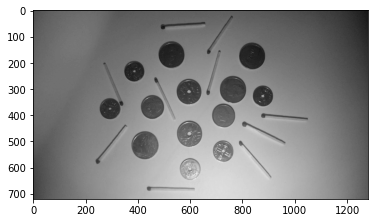

In [4]:
input_img = cv2.imread('test.jpeg')

gray_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, 'gray')
plt.show()


이미지 resize(크기조정)

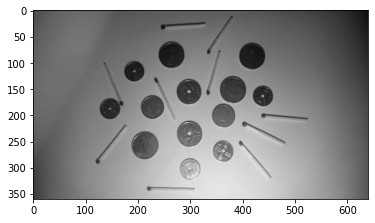

(360, 640)

In [5]:
scale_percent = 50 # percent of original size
width = int(gray_img.shape[1] * scale_percent / 100)
height = int(gray_img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
img = cv2.resize(gray_img, dim, interpolation = cv2.INTER_AREA)

plt.imshow(img, 'gray')
plt.show()

img.shape


1. Nearest Neighbor Interpolation
- 가장 가까운 값으로 채우는 방법
- Nearest Neighbor Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오
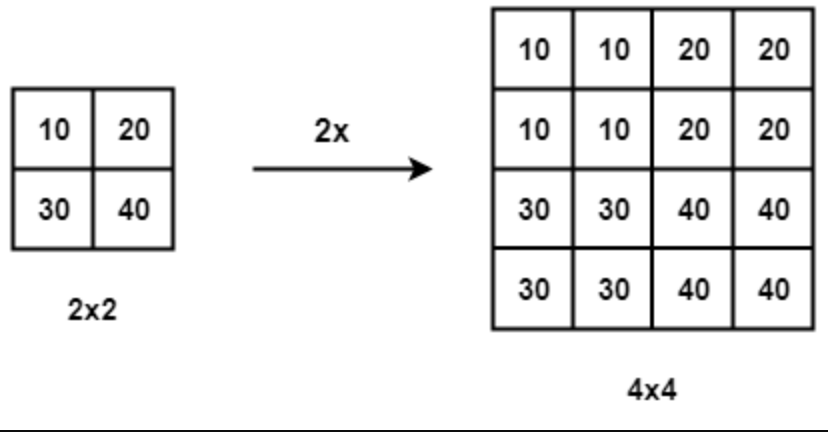

1-1 Neareset Neighbor Interpolation을 이용하여 2배로 영상을 확대하였을 때의 결과를 출력하시오

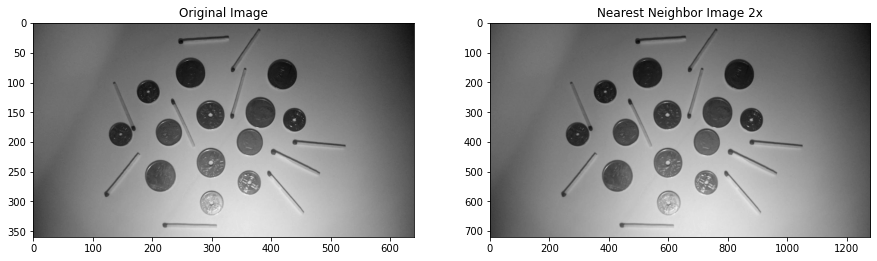

In [45]:
#Neareest Neighbor Interpotation 함수를 작성하시오
def nn_interpolation2(img):
  height = len(img)
  width = len(img[0])

  output_img = []
  for i in range(0, height):
    arr = []
    for j in range(0, width):
      arr.append(img[i][j])
      arr.append(img[i][j])
    output_img.append(arr)
    output_img.append(arr)
  return output_img
    

#2배 확대하였을 때 영상을 가시화 하시오
nn_img2 = nn_interpolation2(img)
nn_images = [img, nn_img2]
nn_titles = ['Original Image', 'Nearest Neighbor Image 2x']
plot_img(nn_images, nn_titles)


1-2 Neareset Neighbor Interpolation을 이용하여 4배로 영상을 확대하였을 때의 결과를 출력하시오

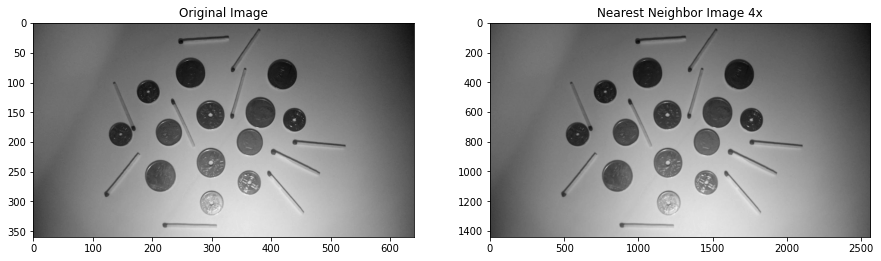

In [46]:
#Neareest Neighbor Interpotation 함수를 작성하시오
def nn_interpolation4(img):
  height = len(img)
  width = len(img[0])

  output_img = []
  for i in range(0, height):
    arr = []
    for j in range(0, width):
      arr.append(img[i][j])
      arr.append(img[i][j])
      arr.append(img[i][j])
      arr.append(img[i][j])
    output_img.append(arr)
    output_img.append(arr)
    output_img.append(arr)
    output_img.append(arr)
  return output_img
    

#4배 확대하였을 때 영상을 가시화 하시오
nn_img4 = nn_interpolation4(img)
nn_images = [img, nn_img4]
nn_titles = ['Original Image', 'Nearest Neighbor Image 4x']
plot_img(nn_images, nn_titles)


2. Bilinear Interpolation
- 주변 값으로 채우는 방법
- Biinear Interpolation으로 2배 큰 영상을 만든 후에 가시화하시오

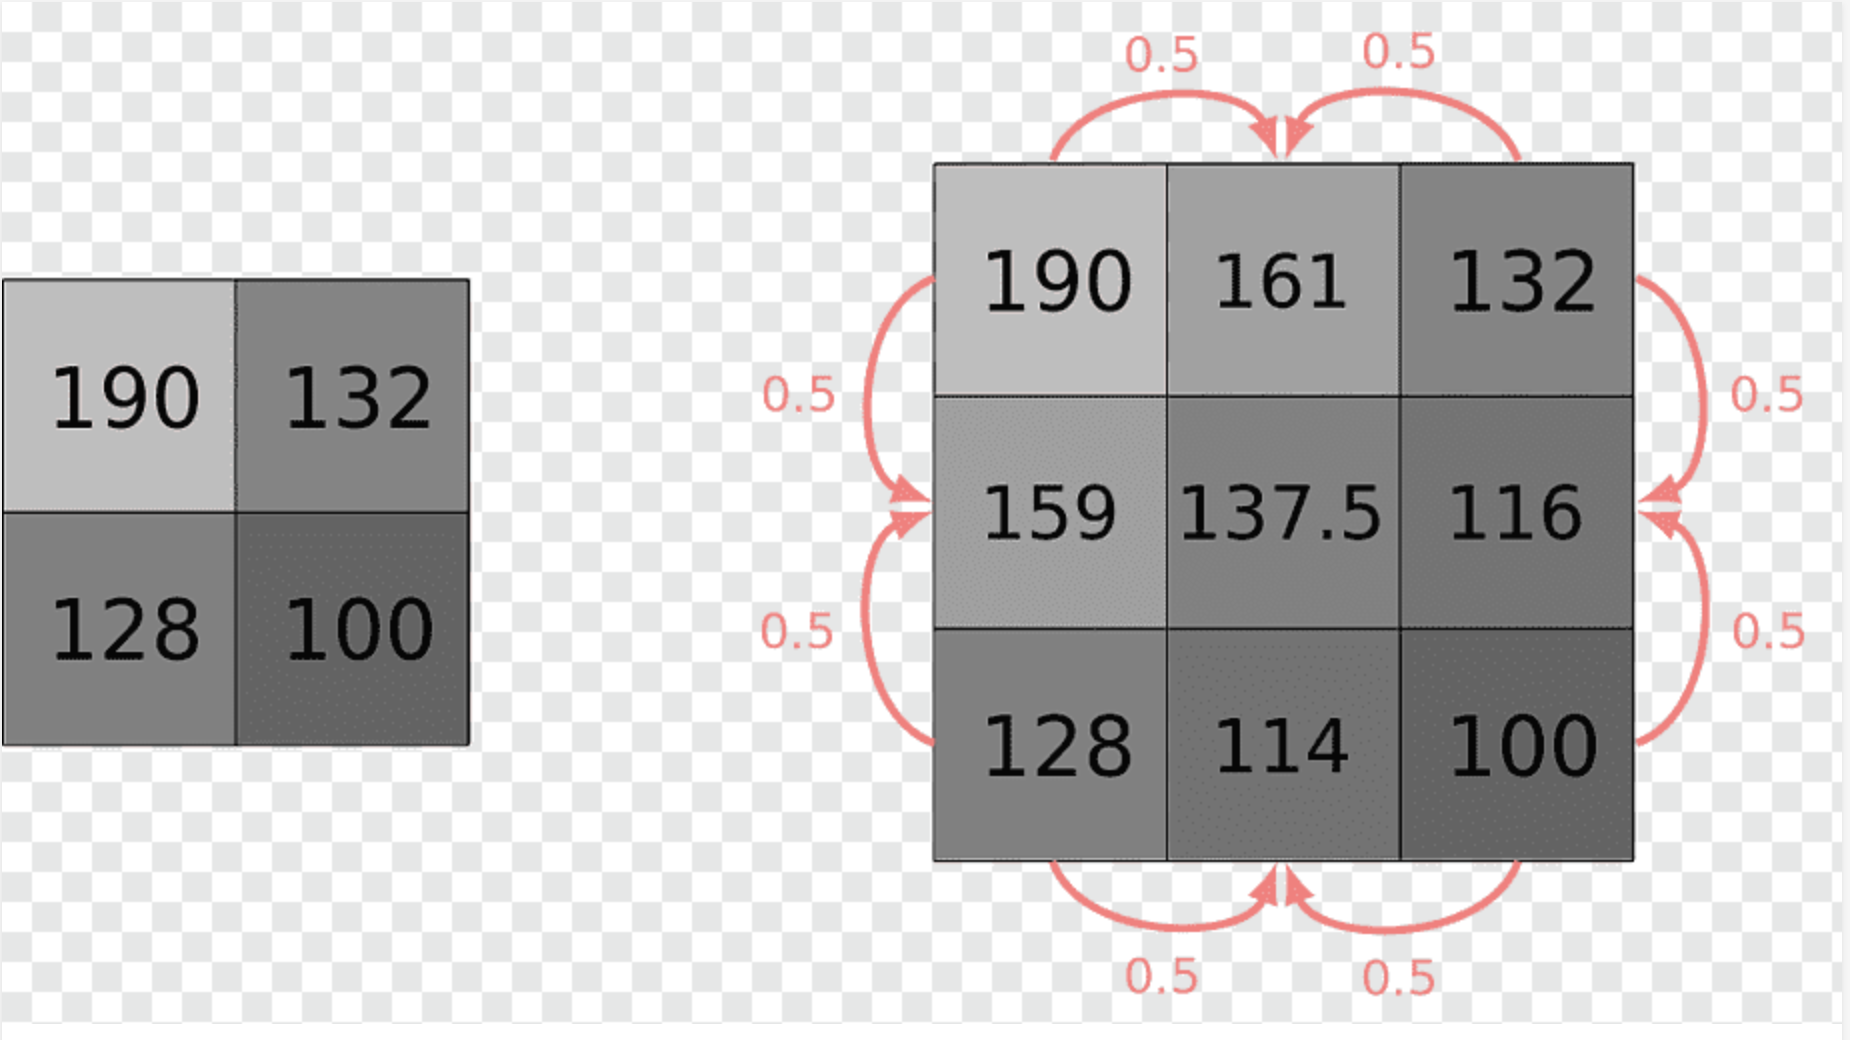

2-1 Bilinear Interpolation을 이용하여 2배로 영상을 확대하였을 때의 결과를 출력하시오

Bilinear에 대하여 다음 그림과 수식을 이용하여 구하시요
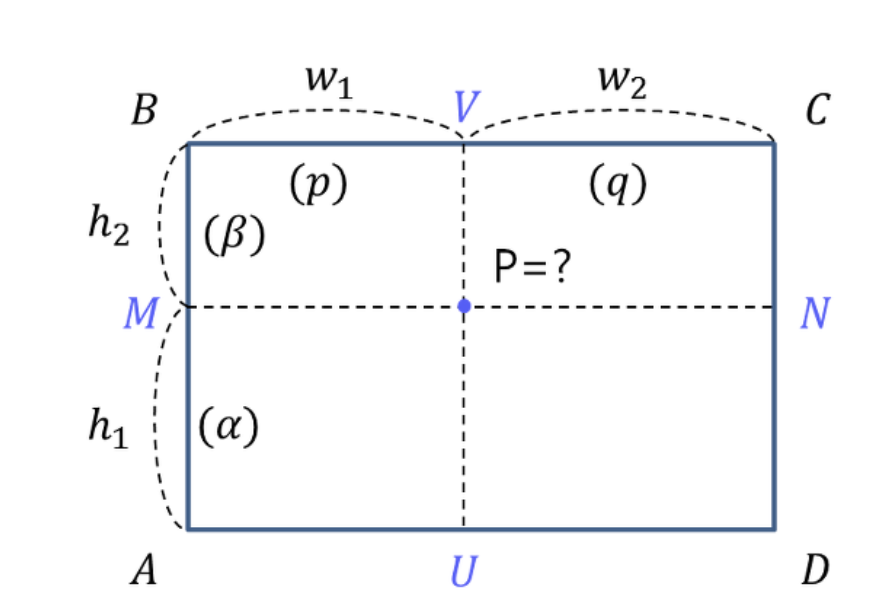

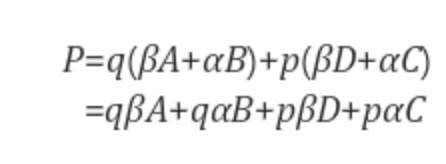

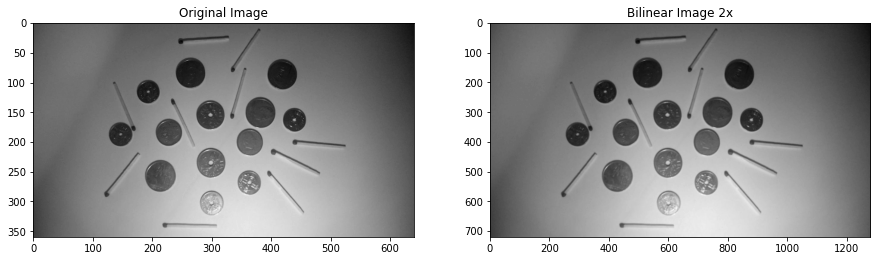

In [47]:
# Bilinear Interpotation 함수를 작성하시오
def bilinear_interpolation(img, rate):
    width = len(img[0])
    height = len(img)

    new_W = rate * width
    new_H = rate * height
    output_img = [[0 for col in range(new_W)] for row in range(new_H)]

    for j in range(new_H):
      for i in range(new_W):
        rx = float((width-1)*i/(new_W-1))
        ry = float((height-1)*j/(new_H-1))

        x1 = int(rx)
        y1 = int(ry)

        x2 = x1 + 1
        if x2 == width:
          x2 = width - 1
        y2 = y1 + 1
        if y2 == height:
          y2 = height - 1

        p = rx - x1
        q = ry - y1

        value = (1. - p)*(1. - q)*img[y1][x1] + p*(1. - q)*img[y1][x2] + (1. - p)*q*img[y2][x1] + p*q*img[y2][x2]
        
        output_img[j][i] = round(value)
    return output_img

# 2배 확대하였을 때 영상을 가시화 하시오
bl_img2 = bilinear_interpolation(img, 2)
bl_images = [img, bl_img2]
bl_titles = ['Original Image', 'Bilinear Image 2x']
plot_img(bl_images, bl_titles)

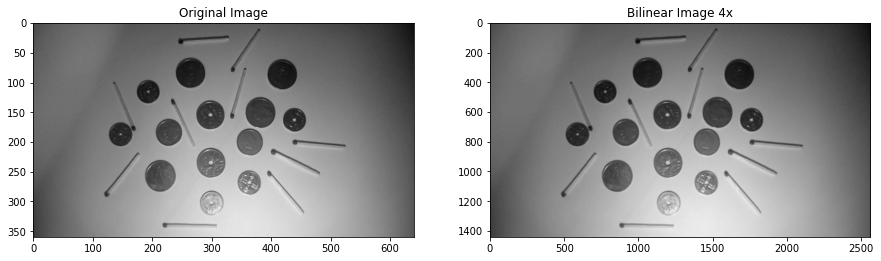

In [48]:
#4배 확대하였을 때 영상을 가시화 하시오
bl_img4 = bilinear_interpolation(img, 4)
bl_images = [img, bl_img4]
bl_titles = ['Original Image', 'Bilinear Image 4x']
plot_img(bl_images, bl_titles)